# 建立多元线性回归模型预测二手车价格

## 数据集介绍

- 数据集中包含的变量有
    - 汽车品牌类型
    - 汽车模型类型
    - 汽车发动机燃料类型
    - 汽车生产年份
    - 发动机尺寸
    - 已行里程数
    - 操作类型（手动挡/自动挡）
    - 汽车价格

**数据规模**

$$1000\text{rows} \times 8\text{columns}$$

**数据地址**

[https://huggingface.co/datasets/Vishaltiwari2019/Car-Price-Prediction](https://huggingface.co/datasets/Vishaltiwari2019/Car-Price-Prediction)

## 建模思路

1. 先确定因变量为汽车价格，其余变量都作为可能的自变量

2. 有类型为category类型的数据，将这些数据进行独热编码，将一列category数据变为n-1列由0，1组成的bool类型数据，将数据分成训练集和测试集模拟真实预测情景

3. 探究这些热编码数据之间在多元线性模型中是否有多重共线性，对模型进行t，F检验，多重共线性诊断

4. 计算$R^2$和$\text{Adjusted }R^2$

5. 进行残差分析检验样本数据是否存在自相关等问题

6. 进行逐步回归确定最佳模型

7. 对最佳模型进行回归分析，残差分析

## 建模与分析

### 构建多元线性回归模型

**数学公式：**

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \varepsilon
$$

**矩阵形式：**

$$
\mathbf{Y} = \mathbf{X}\mathbf{\beta} + \mathbf{\varepsilon}
$$

**参数估计（最小二乘法）：**

$$
\hat{\mathbf{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}
$$

### 模型的评价

- [t检验](#t检验)
- [F检验](#F检验)
- [决定系数$R^2$](#决定系数和)
- [多重共线性诊断](#多重共线性诊断)

#### t检验

- 检验线性回归系数与预测值之间的联系检验单个自变量系数的统计显著性

- 判断某个特定自变量是否对因变量有显著影响

- 评估特定系数是否显著不等于零

**计算公式**

$$
t = \frac{\hat{\beta_j}}{SE_{\hat{\beta_j}}}
$$

**标准误差计算公式**

$$
SE_{\hat{\beta_j}} = \sqrt{\hat{\sigma}^2 \cdot (X'X)_{jj}^{-1}}
$$

$$
\hat{\sigma}^2 = \frac{1}{n-p-1}\sum_{i=1}^n(y_i-\hat{y_i})^2
$$

**判断标准**

- |t| > t临界值时，拒绝原假设（系数等于零），认为该变量有显著影响
- t临界值通常从t分布表查询，取决于显著性水平（通常0.05）和自由度（n-k-1，其中k为自变量个数，n为样本容量）

#### F检验
- 评估整个模型的统计显著性
- 判断所有自变量是否共同对因变量有显著影响
- 测试所有回归系数是否同时为零

**计算公式**

$$
F = \frac{ESS/k}{RSS/(n-k-1)} = \frac{R^2/k}{(1-R^2)/(n-k-1)}
$$

**判断标准**

- F > F临界值时，拒绝原假设（所有系数同时为零），认为模型整体显著
- F临界值通常从F分布表查询，取决于显著性水平（通常0.05）和自由度（k和n-k-1）

#### 决定系数$R^2$和$\text{Adjusted }R^2$
- 评估模型的解释能力或拟合优度
- 测量自变量能解释因变量变异的比例
- 反映模型预测值与实际值的接近程度

**计算公式**
*$R^2$*
$$
R^2 = 1 - \frac{RSS}{TSS} = \frac{ESS}{TSS}
$$

*$\text{Adjusted }R^2$*
$$
\text{Adjusted }R^2 = 1 - \frac{RSS/(n-k-1)}{TSS/(n-1)} = 1 - (1-R^2)\frac{n-1}{n-k-1}$$

*RSS (残差平方和)*
$$
RSS = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

*TSS (总平方和)*
$$
TSS = \sum_{i=1}^{n}(y_i - \bar{y})^2
$$

*ESS (解释平方和)*
$$
ESS = \sum_{i=1}^{n}(\hat{y}_i - \bar{y})^2
$$

**判断标准**
- $R^2$ 介于0到1之间，越接近1表示模型解释力越强
- 一般来说，$R^2 > 0.8$ 表示拟合效果较好
- 模型的横向比较时，应该优先考虑调整后的R²

#### 多重共线性诊断

- 当模型的线性关系检验（F检验）显著时，几乎所有回归系数${\beta}_j$的t检验却不显著时，暗示模型可能存在多重共线性
- 容忍度，方程膨胀因子，条件索引指标是检验共线性的指标之一

**方程膨胀因子计算公式**

$$
VIF_j = \frac{1}{1-R_j^2}
$$

**容忍度**
$$
\frac{1}{VIF}
$$

**条件索引指标**
$$
n_k = \sqrt{\frac{{\lambda}_{max}}{{\lambda}_k}} \times 100
$$

- ${\lambda}_{max}$ 是设计矩阵X（包含截距）的奇异值分解中最大奇异值的平方
- ${\lambda}_k$ 是第k个奇异值的平方（k = 1,2,...,p，p为自变量数）
- $η_k$ 代表第k个条件指数

**判断指标**
- 一般情况下当容忍度<0.1、VIF>10或CI>30时，则认为自变量间具有多重共线性

### 残差分析

- 差序列的随机性分析
    - 绘制散点图，横坐标为预测值，纵坐标为标准化残差
- 残差序列的方差齐性诊断
    - 残差平方图，横坐标为预测值，纵坐标为标准化残差
    - 若残差平方与预测值之间没有明显关系，散点应随机分布在y=1水平线两侧
- [残差序列的独立性分析](#D-W检验)
- [残差序列的正态性分析](#Shapiro正态性检验)

#### D-W检验

- 检测残差的自相关性：判断回归模型残差是否满足独立性假设
- 验证回归模型的有效性：自相关残差表明模型可能缺少重要变量或存在结构问题

**计算公式**

$$
DW = \frac{\sum_{t=2}^{n}(e_t - e_{t-1})^2}{\sum_{t=1}^{n}e_t^2}
$$

**判断标准**
- DW ≈ 2：表示残差无自相关
- 0 < DW < 2：可能存在正自相关
- 2 < DW < 4：可能存在负自相关

#### Shapiro正态性检验

- 残差是否服从均值为零的正态分布

**stat值（W统计量）**

- W统计量是Shapiro-Wilk检验的核心指标
- 取值范围在0到1之间
- W值越接近1，表明数据越符合正态分布
- 计算公式：

$$
W = \frac{(\sum_{i=1}^{n} a_i x_{(i)})^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

- 其中$x_{(i)}$是按大小排序的样本值
- $a_i$是根据样本大小生成的权重常数

**p值**

- p值表示在原假设（数据来自正态分布）为真的情况下，观察到当前或更极端数据的概率
- p值越小，拒绝原假设的证据越强，通常认为p<0.05的情况下可以拒绝原假设


## 代码实现

### 数据处理

#### 导入库，查看原始数据

In [ ]:
#导入必要的库

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
import re

# 设置全局随机种子
N = random.randint(1,100)
print(f'全局随机种子为{N}')
#读取数据
data = pd.read_csv('Car_Price_Prediction.csv')
#镜像数据：
#data = pd.read_csv('hf://datasets/Vishaltiwari2019/Car-Price-Prediction/Car_Price_Prediction.csv')

#查看数据基本信息
print(data.isnull().sum())

data.head()


全局随机种子为24


c:\zhao\PYTHON_renwu\pythonProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64


,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


#### 对数据进行独立热编码

In [2]:
# 提取出需要热编码的列
columns = ['Make', 'Model', 'Fuel Type', 'Transmission']
hot_code = data[columns]

# 将这些列从data中剔除掉
data = data[[x for x in data.columns if x not in columns]]
# 进行热编码
hot_code = pd.get_dummies(hot_code, columns=columns, drop_first=True)
# 将热编码类型从bool类型转换为int类型
hot_code = hot_code*1
# 合并数据
data = pd.concat([data,hot_code], axis=1)

data.head()


,Year,Engine Size,Mileage,Price,Make_BMW,Make_Ford,Make_Honda,Make_Toyota,Model_Model B,Model_Model C,Model_Model D,Model_Model E,Fuel Type_Electric,Fuel Type_Petrol,Transmission_Manual
0,2015,3.9,74176,30246.207931,0,0,1,0,1,0,0,0,0,1,1
1,2014,1.7,94799,22785.747684,0,1,0,0,0,1,0,0,1,0,0
2,2006,4.1,98385,25760.290347,1,0,0,0,1,0,0,0,1,0,1
3,2015,2.6,88919,25638.003491,0,0,1,0,1,0,0,0,1,0,0
4,2004,3.4,138482,21021.386657,0,0,1,0,0,1,0,0,0,1,0


#### 绘制热力图和散点图检查数据相关性

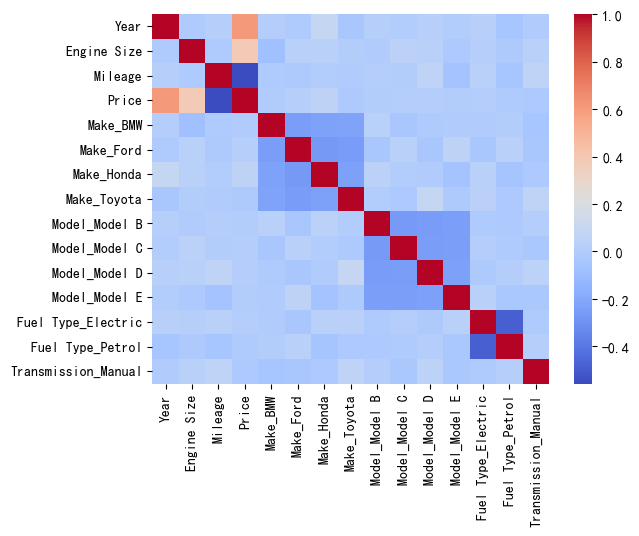

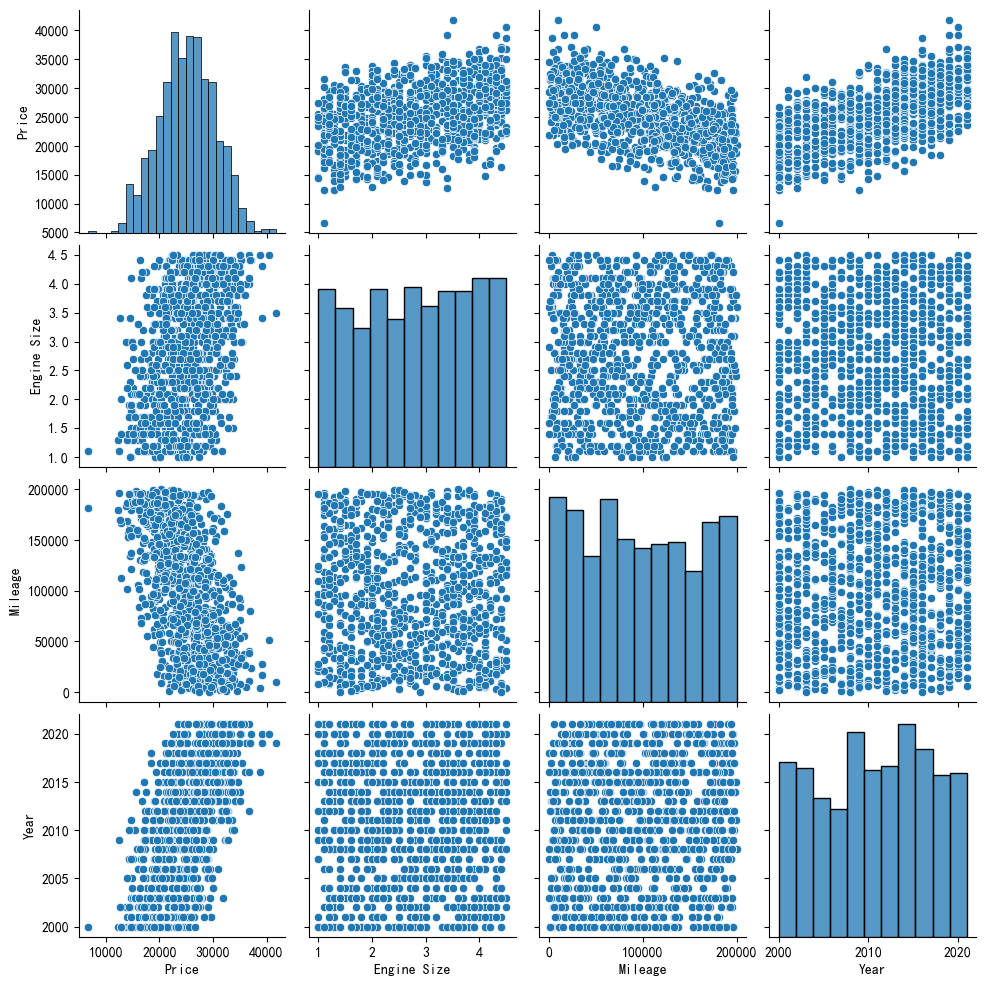

In [3]:
# 绘制热力图
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(data.corr(),annot=False,cmap='coolwarm')
sns.pairplot(data[['Price','Engine Size','Mileage','Year']])
plt.show()

#### 拆分数据
1. 把目标变量分离出来
2. 将数据分成训练集和测试集

In [4]:
# 分离目标变量
y = data['Price']
x = data.drop('Price', axis=1)
# 准备训练集与测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=N)

#### 模型训练

In [5]:
model = LinearRegression()

model.fit(x_train,y_train)
x_features = model.coef_
print(x_features)
k = len(x_features)
n = 800

[ 5.19352613e+02  1.92791352e+03 -4.83202688e-02  2.48898409e+02
  8.40945821e+01 -2.44233335e+02 -1.73800224e+01  2.65269867e+02
  2.15733563e+02  3.91640211e+02 -1.81885911e+02  2.73818676e+02
  1.12331036e+02  5.05130762e+00]


### 模型评估

#### 计算$R^2$和$\text{Adjusted}R^2$

In [6]:
# 计算R^2和调整后的R^2
r2 = model.score(x_train, y_train)

adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print(f"模型R^2: {r2}")
print(f"调整后的R^2: {adj_r2}")


模型R^2: 0.8354669046877916
调整后的R^2: 0.8325325564911408


#### 计算$t$统计量

In [7]:
# 计算自由度
df = n-1-k

# 计算预测值
y_pred = model.predict(x_train)

# 计算均方误差
MSE = mean_squared_error(y_train,y_pred)*n/df

# 计算X'X的逆矩阵
X_matrix = np.matrix(x_train)
XtX_inv = np.linalg.inv(X_matrix.T @ X_matrix)

# 计算每个系数的标准误
se = np.sqrt(np.diagonal(XtX_inv * MSE))

# 计算t值
t_values = x_features/se

# 计算p值
p_values = 2 * (1 - stats.t.cdf(abs(t_values), df=df))
table_dict = {'标准误差':[],'t值':[],'显著性':[]}
# 结果
for i, (name, t_val) in enumerate(zip(x_train.columns, t_values)):
    table_dict['t值'].append(t_val)
    table_dict['标准误差'].append(se[i])
    table_dict['显著性'].append(abs(t_val)>1.94)
table_t = pd.DataFrame(table_dict)
table_t = table_t.set_index(x_train.columns)
table_t.index.name = '自变量'
table_t

,标准误差,t值,显著性
自变量,,,
Year,0.172190,3016.152160,True
Engine Size,71.635625,26.912776,True
Mileage,0.001270,-38.043673,True
Make_BMW,237.316299,1.048805,False
Make_Ford,223.987400,0.375443,False
Make_Honda,232.485628,-1.050531,False
Make_Toyota,236.286156,-0.073555,False
Model_Model B,231.451097,1.146116,False
Model_Model C,234.496366,0.919987,False


#### $f$检验

In [8]:
F = r2/k/(1-r2)*(df)
print(f"F:    {F}>2.2?    {F>2.2}")

F:    284.7197567219053>2.2?    True


#### 计算$VIF_j$方差膨胀因子

In [9]:
table_dict = {'VIF值':[],'共线性':[]}
for i in x_train.columns.tolist():
    temp_y = x_train[i]
    temp_x = x_train.drop(i, axis=1)
    temp_model = LinearRegression()
    temp_model.fit(temp_x,temp_y)
    VIF = 1-(1-temp_model.score(temp_x,temp_y))
    table_dict['VIF值'].append(VIF)
    table_dict['共线性'].append(VIF>10)
table_v = pd.DataFrame(table_dict)
table_v = table_v.set_index(x_train.columns)
table_v.index.name = '自变量'
table_v

,VIF值,共线性
自变量,,
Year,0.017008,False
Engine Size,0.011981,False
Mileage,0.024557,False
Make_BMW,0.351726,False
Make_Ford,0.378555,False
Make_Honda,0.357411,False
Make_Toyota,0.347113,False
Model_Model B,0.390054,False
Model_Model C,0.384280,False


#### 残差分析

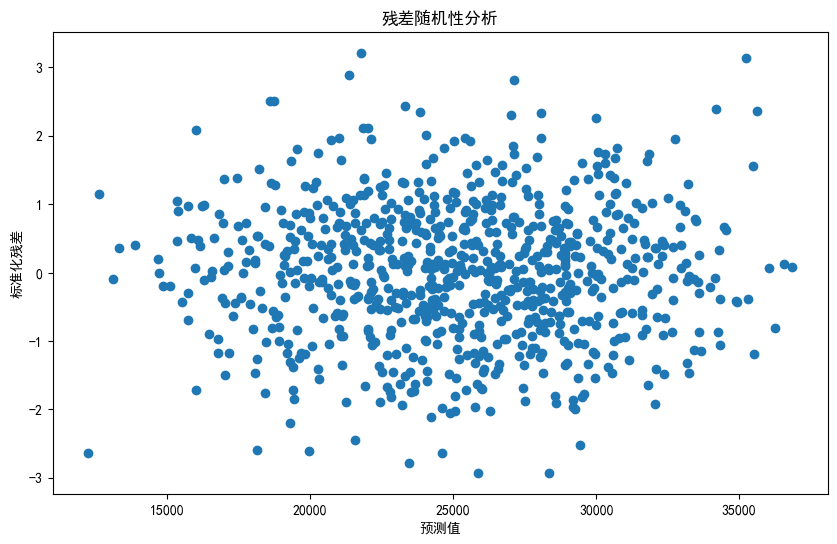

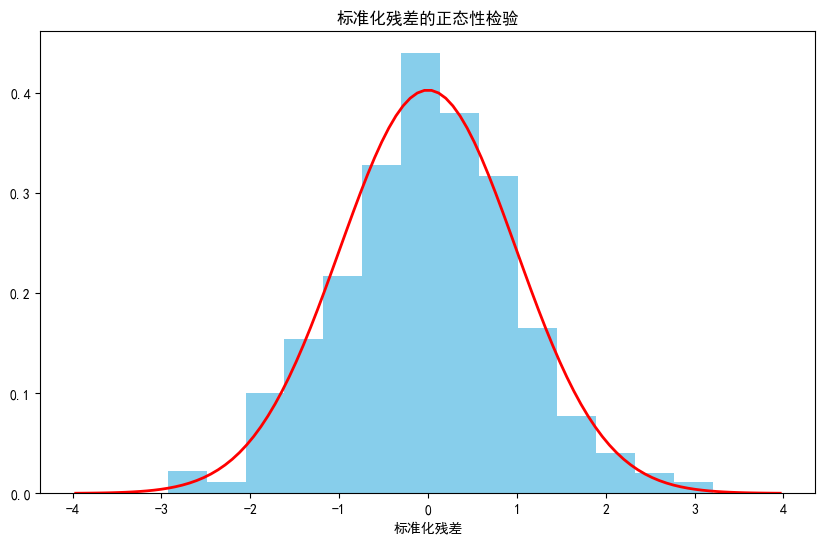

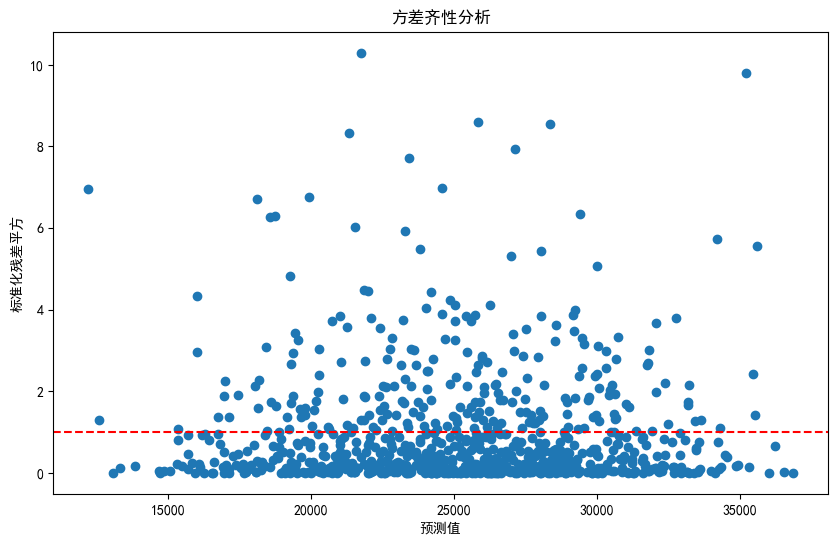

Durbin-Watson 统计量: 1.9744
不存在明显的自相关性
正态检验p值0.5507748501372141    True


In [10]:
# 残差随机性分析
e = y_train-y_pred
e_std = e/(MSE)**0.5
plt.figure(figsize=(10,6))
plt.scatter(y_pred,e_std)
plt.xlabel('预测值')
plt.ylabel('标准化残差')
plt.title('残差随机性分析')
plt.show()
# 正态性检验
mu = e_std.mean()
sigma = e_std.std()
x_plot = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y_plot = stats.norm.pdf(x_plot, mu, sigma)
plt.figure(figsize=(10,6))
plt.hist(e_std, bins=14, density=True, color='skyblue')
plt.plot(x_plot, y_plot, 'r-', lw=2)
plt.xlabel('标准化残差')
plt.title('标准化残差的正态性检验')
plt.show()
tate,p = stats.shapiro(e_std)
# 方差齐性检验
plt.figure(figsize=(10,6))
plt.scatter(y_pred, e_std**2)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('预测值')
plt.ylabel('标准化残差平方')
plt.title('方差齐性分析')
plt.show()
# 计算DW统计量
dw_stat = durbin_watson(e_std)
print(f"Durbin-Watson 统计量: {dw_stat:.4f}")

# 判断自相关性
if dw_stat < 1.5:
    print("存在正自相关")
elif dw_stat > 2.5:
    print("存在负自相关")
else:
    print("不存在明显的自相关性")
print(f"正态检验p值{p}    {p>0.05}")

#### 预测

In [11]:
r2_test = model.score(x_test,y_test)

adj_r2_test = 1-(1-r2_test)*(200-1)/(200-k-1)

print(f"测试集R^2: {r2_test}")
print(f"调整后测试集R^2: {adj_r2_test}")

测试集R^2: 0.8541301711801208
调整后测试集R^2: 0.8430913733234813


### 利用逐步回归确定最终模型

#### 逐步回归

In [12]:
# 准备数据
temp_data = data.copy()
for i in columns:
    # 生成正则表达式
    pattern = re.compile(i)
    drop_list = [col for col in temp_data.columns if pattern.match(col)]
    temp_data = temp_data.drop(drop_list, axis=1)
    temp_x = temp_data.drop('Price', axis=1)
    temp_y = temp_data['Price']
    temp_x_train,temp_x_test,temp_y_train,temp_y_test = train_test_split(temp_x,temp_y,test_size=0.2,random_state=N)
    temp_model = LinearRegression()
    temp_model.fit(temp_x_train,temp_y_train)
    temp_r2 = temp_model.score(temp_x_train,temp_y_train)
    temp_adj_r2 = 1-(1-temp_r2)*(n-1)/(n-k-1)
    print(f"移除{i}的R^2: {temp_r2}")
    print(f"移除{i}的调整后的R^2: {temp_adj_r2}")

移除Make的R^2: 0.8345440392443167
移除Make的调整后的R^2: 0.8315932323009033
移除Model的R^2: 0.8331382403734594
移除Model的调整后的R^2: 0.8301623618578269
移除Fuel Type的R^2: 0.832700758654302
移除Fuel Type的调整后的R^2: 0.8297170779169265
移除Transmission的R^2: 0.8326999292285672
移除Transmission的调整后的R^2: 0.8297162336988856


#### 模型准备

In [13]:
model_re = LinearRegression()
columns_useful = ['Year','Engine Size', 'Mileage']
x_re = x[columns_useful]
y_re = data['Price']
x_train_re,x_test_re,y_train_re,y_test_re = train_test_split(x_re,y_re,test_size=0.2,random_state=N)
model_re.fit(x_train_re,y_train_re)
x_features_re = model_re.coef_
k_re = len(x_features_re)
print(x_features_re)

[ 5.18440784e+02  1.93142045e+03 -4.79693750e-02]


#### 计算$R^2$和$\text{Adjusted }R^2$

In [14]:
# 计算R^2和调整后的R^2
r2_re = model_re.score(x_train_re, y_train_re)

adj_r2_re = 1-(1-r2_re)*(n-1)/(n-k_re-1)

print(f"模型R^2: {r2_re}")
print(f"调整后的R^2: {adj_r2_re}")


模型R^2: 0.8326999292285672
调整后的R^2: 0.8320694013236497


#### $t$检验

In [15]:
# 计算自由度
df_re = n-1-k_re

# 计算预测值
y_pred_re = model_re.predict(x_train_re)
# 计算均方误差
MSE_re = mean_squared_error(y_train_re,y_pred_re)*n/df_re

# 计算X'X的逆矩阵
X_matrix_re = np.matrix(x_train_re)
XtX_inv_re = np.linalg.inv(X_matrix_re.T @ X_matrix_re)

# 计算每个系数的标准误
se_re = np.sqrt(np.diagonal(XtX_inv_re * MSE_re))

# 计算t值
t_values_re = x_features_re/se_re

# 计算p值
p_values_re = 2 * (1 - stats.t.cdf(abs(t_values_re), df=df_re))
table_dict_re = {'标准误差':[],'t值':[],'显著性':[]}
# 结果
for i, (name, t_val_re) in enumerate(zip(x_train_re.columns, t_values_re)):
    table_dict_re['t值'].append(t_val_re)
    table_dict_re['标准误差'].append(se_re[i])
    table_dict_re['显著性'].append(abs(t_val_re)>1.94)
table_t_re = pd.DataFrame(table_dict_re)
table_t_re = table_t_re.set_index(x_train_re.columns)
table_t_re.index.name = '自变量'
table_t_re

,标准误差,t值,显著性
自变量,,,
Year,0.123067,4212.656083,True
Engine Size,71.306422,27.086206,True
Mileage,0.001258,-38.145191,True


#### $f$检验

In [16]:
F = r2_re/k_re/(1-r2_re)*(df_re)
print(f"F:    {F}>2.2?    {F>2.2}")

F:    1320.6392972212263>2.2?    True


#### 计算$VIF$

In [17]:
table_dict_re = {'VIF值':[],'共线性':[]}
for i in x_train_re.columns.tolist():
    temp_y = x_train_re[i]
    temp_x = x_train_re.drop(i, axis=1)
    temp_model = LinearRegression()
    temp_model.fit(temp_x,temp_y)
    VIF = 1-(1-temp_model.score(temp_x,temp_y))
    table_dict_re['VIF值'].append(VIF)
    table_dict_re['共线性'].append(VIF>10)
table_v_re = pd.DataFrame(table_dict_re)
table_v_re = table_v_re.set_index(x_train_re.columns)
table_v_re.index.name = '自变量'
table_v_re

,VIF值,共线性
自变量,,
Year,0.001970,False
Engine Size,0.000105,False
Mileage,0.002074,False


#### 残差分析

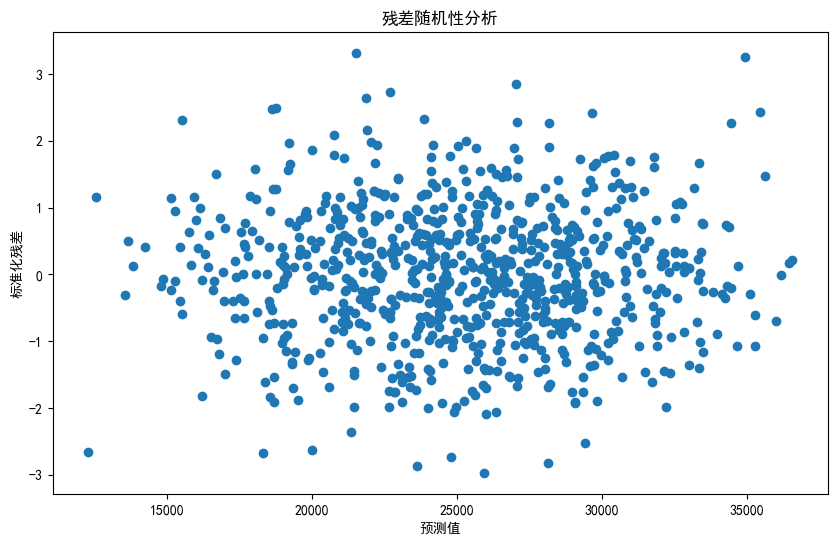

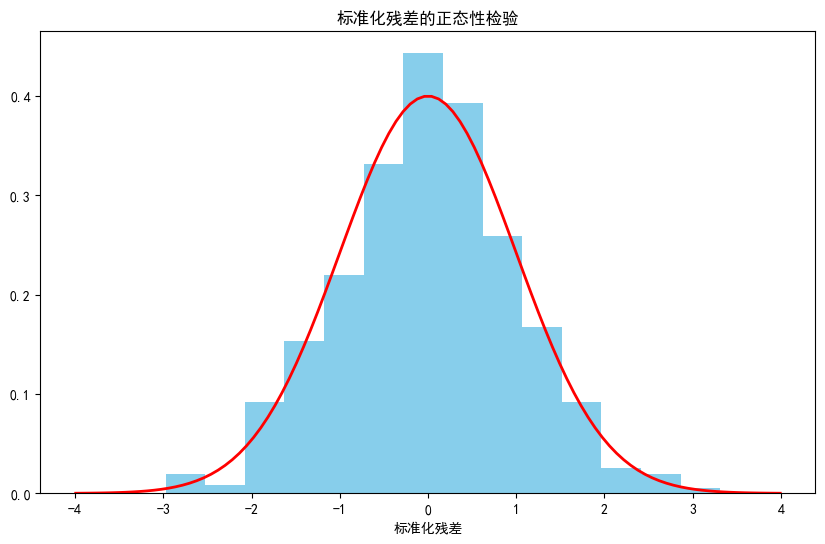

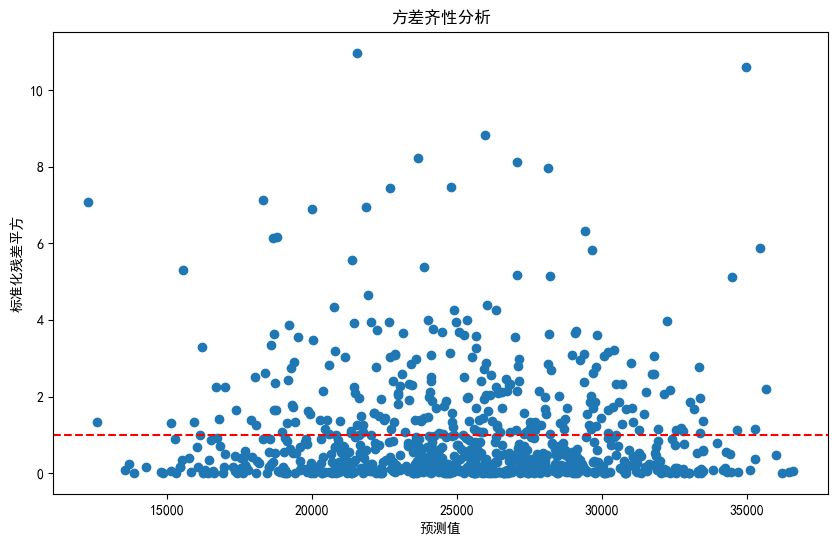

Durbin-Watson 统计量: 1.9903
不存在明显的自相关性
正态检验p值0.6902690865543709    True


In [18]:
# 残差随机性分析
e_re = y_train_re-y_pred_re
e_std_re = e_re/(MSE_re)**0.5
plt.figure(figsize=(10,6))
plt.scatter(y_pred_re,e_std_re)
plt.xlabel('预测值')
plt.ylabel('标准化残差')
plt.title('残差随机性分析')
plt.show()
# 正态性检验
mu_re = e_std_re.mean()
sigma_re = e_std_re.std()
x_plot_re = np.linspace(mu_re - 4*sigma_re, mu_re + 4*sigma_re, 100)
y_plot_re = stats.norm.pdf(x_plot_re, mu_re, sigma_re)
plt.figure(figsize=(10,6))
plt.hist(e_std_re, bins=14, density=True, color='skyblue')
plt.plot(x_plot_re, y_plot_re, 'r-', lw=2)
plt.xlabel('标准化残差')
plt.title('标准化残差的正态性检验')
plt.show()
# 计算shapiro正态性检验的p值
tate,p_re = stats.shapiro(e_std_re)

# 方差齐性检验
plt.figure(figsize=(10,6))
plt.scatter(y_pred_re, e_std_re**2)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('预测值')
plt.ylabel('标准化残差平方')
plt.title('方差齐性分析')
plt.show()

# 计算DW统计量
dw_stat_re = durbin_watson(e_std_re)
print(f"Durbin-Watson 统计量: {dw_stat_re:.4f}")

# 判断自相关性
if dw_stat_re < 1.5:
    print("存在正自相关")
elif dw_stat_re > 2.5:
    print("存在负自相关")
else:
    print("不存在明显的自相关性")
print(f"正态检验p值{p_re}    {p_re>0.05}")

#### 预测

In [19]:
r2_test_re = model_re.score(x_test_re,y_test_re)

adj_r2_test_re = 1-(1-r2_test_re)*(200-1)/(200-k_re-1)

print(f"测试集R^2: {r2_test_re}")
print(f"调整后测试集R^2: {adj_r2_test_re}")

测试集R^2: 0.8625603820776341
调整后测试集R^2: 0.8604567144563734


## 结果分析

**独热编码数据模型**
- 在由进行了独热编码的数据建立的模型中，独热编码的数据t检验不显著，模型F检验显著，但是在共线性诊断中发现变量不具有多重共线性，原因可能是样本数据量相对较大

- 训练集和测试集的$R^2$和$\text{Adjusted }R^2$在各种随机测试下都能达到0.8以上，说明模型本身解释力很强，在未知数据预测中表现良好

- 残差分析中，标准化残差的分布是随机的且满足正态分布，方差齐性诊断散点图散点随机分布在y=1上下，DW检验的值位于2左右，证明数据不存在自相关性，随机分布，没有突变

**最佳模型**
- 在由未进行独热编码的数据建立的模型中，数据t检验显著，模型F检验显著，在共线性诊断中发现变量不具有多重共线性

- 训练集和测试集的$R^2$和$\text{Adjusted }R^2$在各种随机测试下都能达到0.8以上，说明模型本身解释力很强，在未知数据预测中表现良好

- 残差分析中，标准化残差的分布是随机的且满足正态分布，方差齐性诊断散点图散点随机分布在y=1上下，DW检验的值位于2左右，证明数据不存在自相关性，随机分布，没有突变

**模型分析**

*建议应该去掉独热编码项来构建模型:*
- 去掉独热编码之后模型在测试集和训练集中的$\text{Adjusted }R^2$与原模型相当
- 泛化能力更强
- 模型更加简化
- 计算复杂度降低
- 过拟合风险降低